# Machine Learning en Python Notebook

Esta presentación esta basada en el trabajo de [Randal S. Olson](http://www.randalolson.com/). Bajo licencia CC0.

## Indice

1. [Librerias a utilizar](#Librerias-a-utilizar)

2. [Descripción del problema](#Descripción-del-problema)

3. [Step 1: Respondiendo la pregunta](#Step-1:-Respondiendo-la-pregunta)

4. [Step 2: Analizando los datos](#Step-2:-Analizando-los-datos)

5. [Step 3: Corrigiendo el Dataset](#Step-3:-Corrigiendo-el-Dataset)

8. [Step 4: Analisis exploratorio](#Step-4:-Analisis-exploratorio)

9. [Step 5: Clasificación](#Step-5:-Clasificación)

    - [Cross-validation](#Cross-validation)

    - [Ajuste de parametros](#Ajuste-de-parametros)
10. [Step 6: Conclusiones](#Step-6:-Conclusiones)

## Librerias a utilizar

[[ Indice ]](#Indice)

Las librerias que utilizaremos en este ejercicio son las siguientes:

* **NumPy**: Provee una rapida estructura de arreglos numericos y funciones matematicas.
* **pandas**: Provee una structura de DataFrame para almacenar datos en memoria y trabajar con ellos facilmente.
* **scikit-learn**: Provee los paquetes esenciales de Machine Learning en Python.
* **matplotlib**: Libreria basica para visualizacion en Python; La mayoria de las otras librerias son construidas sobre ella.
* **Seaborn**: Libreria avanzada de visualizacion.

Si no tienes instaldo python en tu PC, puedes utilizar la distribución de [Anaconda Python distribution](http://continuum.io/downloads) para instalar la mayoria de los paquetes de python a utilizar. 

Para asegurar que tienes todas las librerias, ejecuta el siguiente comenando en `conda`:

      conda install numpy pandas scikit-learn matplotlib seaborn


## Descripción del problema

[[ Indice ]](#Indice)

Para el proposito de esta presentacion asumiremos que estamos trabajando en un startup que creará una app de smartphone que automaticamente identifique la especie de una flor sacando una fotografia. Somos parte de un pequeño grupo pequeño de Datascients quienes construiran la parte del modelamiento para esta app.

Con el equipo hemos estado trabajando en el desarrollo de una demo utilizando modelamiento con machine learning el que tome 4 medidas de las flores (sepal length, sepal width, petal length y petal width) e indentifique la especie basada solamente en las medidas.

<img src="images/petal_sepal.jpg" />

Nuestros investigadores de campo nos han dado un Data set para desarrollar nuestra demo, que incluye medidas para 3 tipos de flores

### *Iris setosa*

<img src="images/iris_setosa.jpg" />

### *Iris versicolor*
<img src="images/iris_versicolor.jpg" />

### *Iris virginica*
<img src="images/iris_virginica.jpg" />


Las cuatro medidas que estamos usando provienen de las medidas manuales realizadas por nuestros investigadores de campo, pero se mediran automaticamente por un procesamiento de imagenes en el futuro.

## Step 1: Respondiendo la pregunta

[[ Indice ]](#Indice)

El primer paso de cualquier analista de datos es definir la pregunta o problema que buscamos resolver, y definir la medida (o grupos de medidas) para el exito de nuestro trabajo. 

>Definió el tipo de problema a resolver? 

Estamos tratando de clasificar la especie de una flor (i.e., class) basado en 4 medidas: Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

>Definió la medida de exito antes de comenzar?

Dado que estamos realizando una clasificación, podemos usar el  [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) (la fracción de flores correctamente clasificadas) para cuantificar el rendimiento de nuestro modelo. El responsable de datos de nuestra compañía nos ha dicho que debemos lograr al menos un 90% de precisión.


> Entiende el contexto para el problema y la aplicación de negocio o cientifica?

Estamos construyendo parte de un pipeline (tuberia) de analisis de datos para una app smartphone que clasificará las especies de flores desde una imagen. En el futuro este pipeline estara conectado a otros pipelines para la lectura y prediccion de especies. 

>Grabaron el diseño del experimento?

El Jefe de Datos de nuestra compañía nos ha dicho que los investigadores de campo midieron manualmente 50 flores muestreadas al azar de cada especie usando una metodología estandarizada. Los investigadores de campo toman imágenes de cada flor que muestrean desde ángulos predefinidos para que las mediciones y especies puedan ser confirmadas por otros investigadores de campo en un momento posterior. Al final de cada día, los datos se compilan y almacenan en un repositorio privado de la empresa GitHub.

>Es posible responder el problema con los datos que tenemos?

El conjunto de datos que tenemos actualmente es solo para tres tipos de flores * Iris *. El modelo creado a partir de este conjunto de datos solo funcionará para esas flores * Iris *, por lo que necesitaremos más datos para crear un clasificador de flores general.

<hr />

Tenga en cuenta que hemos dedicado una gran cantidad de tiempo a trabajar en el problema sin escribir una línea de código ni mirar los datos.

** Pensar y documentar el problema en el que estamos trabajando es un paso importante para realizar un análisis de datos efectivo que a menudo pasa desapercibido. ** No se lo salte.

## Step 2: Analizando los datos

[[ Indice ]](#Indice)


Generalmente, buscamos la respuesta a las siguientes preguntas:

* Hay algun error con los datos?
* Hay alguna peculiaridad con los datos?
* Necesitamos corregir or remover algunos datos?

Comencemos leyendo los datos con el objeto DataFrame de pandas.

In [2]:
import pandas as pd

iris_data = pd.read_csv('iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Hemos tenido suerte los datos al parecer se encuentran en un formato que podemos ocupar.

La primera fila contiene las cabeceras de las columnas, y los nombres de las columnas son lo suficientemente descriptivas para entender su contenido.


**Una de las primeras cosas que deberiamos hacer es buscar si hay missing values en la data.** Afortunadamente, con pandas basta con identificar como primera medida los missing values como '**NA**'.

In [3]:
iris_data = pd.read_csv('iris-data.csv', na_values=['NA'])

Siempre es una buena idea ver la distribución de nuestros datos - especialmente para identificar los outliers.

Para ello ocuparemos una funcion de pandas que nos entrega el resumen estadisticos del dataset.

In [4]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Podemos observar varios datos interesantes de esta tablea. Por ejemplo, que puede observar que 'petal_width_cm' tiene missgin values.

Sin embargo, es mucho mejor visualizar los datos de alguna forma. La visualizacion hace a los outliers y errores de datos inmediatamente visibles.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Ahora vamos a crear un **scatterplot matrix**. Esta funcion, grafica una matriz con las distribuciones de cada columna.

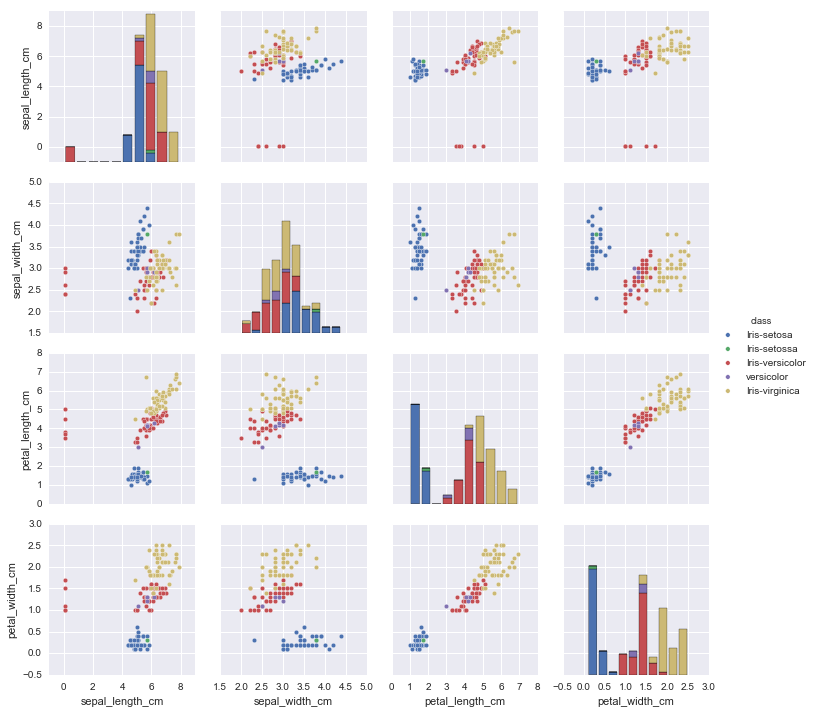

In [6]:
# Eliminamos temporalmente los 'NA' porque Seaborn no sabe como tratar a los missing values.
sns.pairplot(iris_data.dropna(), hue='class')

La visualización nos muestra que existebn algunos problemas con el data set:

1. Hay 5 classes donde solo deberian haber 3, lo cual significa que hay un error de codificación.

2. Claramente se distinguen los outliers que podrian ser errores: Uno en 'sepal_width_cm' para 'iris-setosa' y varios 'sepal_length_cm' para 'iris-versicolor' son de valor cero por alguna razon.

3. Habiamos borrado los missing values.

En todos estos casos, necesitamos resolver que hacer con los datos erroneos.

## Step 3: Corrigiendo el Dataset

[[ Indice ]](#Indice)

Hemos identidicado varios errores en el data ser, necesitamos corregirlos antes de proceder con el analisis.

Iremos corrigiendo los problemas uno a uno.

>**Hay 5 classes donde solo deberian haber 3, lo cual significa que hay un error de codificación.**

* En el primer caso, sumaremos `Iris-` para dejarlos como los demas, esto es: `Iris-versicolor`. 
* En el otro casos, reemplzaremos `Iris-setossa` por `Iris-setosa`.

Vamos a usar la funcion 'loc' de pandas para corregir el problema:

In [7]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Mucho mejor! Ahora solo tenemos 3 tipos de clases. 

>**Claramente se distinguen los outliers que podrian ser errores: Uno en 'sepal_width_cm' para 'iris-setosa' y varios 'sepal_length_cm' para 'iris-versicolor' son de valor cero por alguna razon.**

Corregir outlier siempre es una tarea complicada. Es raro saber si el outlier fue causado por un error de medida o porque se registraron los datos en una medida diferente, o si el outlier es una anomalia real. Por estas razones, debemos ser juiciosos cuando trabajemos con autliers: Si decidimos excluir los datos debemos dejar claramente documentada la accion y proveer solidas razones de la medida.

En nuestro casos, la anomalia para `Iris-setosa`, según nuestro experto es imposible que estas posean valores bajo los 2.5 cm. Por lo tanto, esta medida es un error y lo mas simple es eliminarla del Dataset en vez de pasar horas investigando que sucedio.

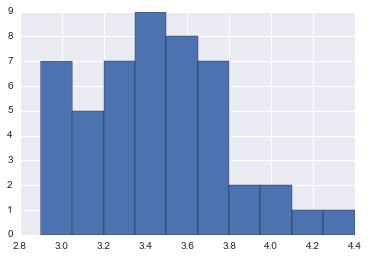

In [8]:
# Esta linea elimina cualquier registro 'Iris-setosa' con valores menores a 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

Excellente! Ahora todas nuestras filas `Iris-setosa` tienen un `sepal width` mayor a 2.5 cm.

El siguiente problema a resolver son los valores cercanos a cero de sepal lengths para `Iris-versicolor`.

In [9]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


Al parecer estos valores de `sepal_length_cm` fueron guardados en otra magnitud, al parecer se grabaron en metros en vez de centimetros.

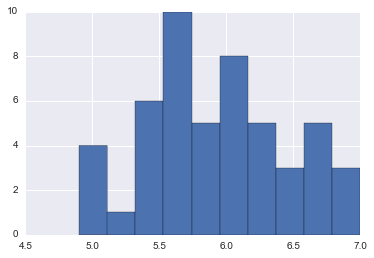

In [10]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0), 'sepal_length_cm'] *= 100.0
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

Se puede observar que se han corregido los datos en en Dataset.

>**Habiamos borrado los missing values.**

Miremos que pasa con los registros que tienen valores missing.

In [11]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


No es buena idea eliminar estos registros considerando que todos pertenecen a `Iris-setosa` y se encuentran en la misma columna. Dado lo angerior, elegimos una estrategia de imputación por medio del promedio **mean imputation**.

Miramos la distribución de `petal_width_cm`.

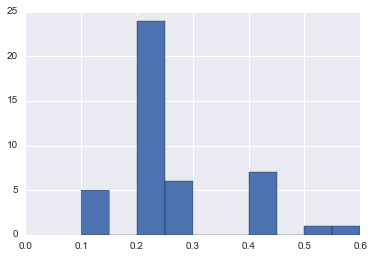

In [12]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

La mayoria de los valores de `Iris-setosa` se encuentran entre 0.2-0.3, por lo tanto, llenaremos estos valores con el promedio de petal width.

In [13]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [14]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


Genial! Hemos corregido todos los valores nulos. 

Despues de todo este trabajo, no queremos repetir el proceso cada vez que trabajemos con el dataset. Por este motivo, guardaremos el Dataset corregido fisicamente en el disco y en el futuro trabajaremos directamente en el.

In [15]:
iris_data.to_csv('iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('iris-data-clean.csv')

Miramos nuevamente el la matriz scatterplot con los datos corregidos.

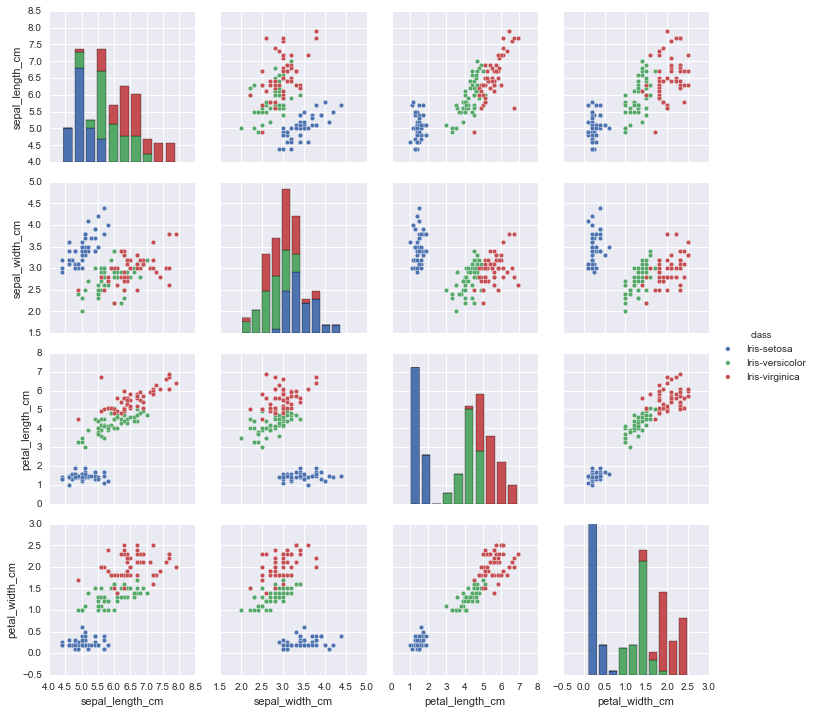

In [16]:
sns.pairplot(iris_data_clean, hue='class')

Las conclusiones generales hasta este punto deberian ser:

* Asegurate que los datos estan codificados correctamente.

* Asegúrese de que sus datos estén dentro del rango esperado, y use el conocimiento del dominio siempre que sea posible para definir ese rango esperado.

* Trate con los datos faltantes de una forma u otra: reemplácelo si puede o eliminelos.

* Nunca arregle sus datos manualmente porque eso no es fácilmente reproducible.

* Use el código como un registro de cómo ordenó sus datos

* Grafique todo lo que pueda los datos en esta etapa del análisis para que pueda * confirmar * visualmente que todo se vea correcto

## Step 4: Analisis exploratorio

[[ Indice ]](#Indice)

Despues de pasar un monton de tiempo limpiando nuestros datos, estamos en condiciones de analizar los datos.

El analisis exploratorio es el paso donde empezamos a profundizar en el conjunto de los datos, mas alla de los datos atipicos tales y los errores. Intentamos responder preguntas tales como:

* Como se distribuyen mis datos?

* Hay alguna correlacion en mis datos?

* Hay algun ["confounder factor"](https://en.wikipedia.org/wiki/Confounding) que explique estas correlaciones? 

En este escenario es donde graficamos los datos de todas las maneras posibles. Crea muchos graficos y no te preocupes que sean bonitos, son solo para uso interno.


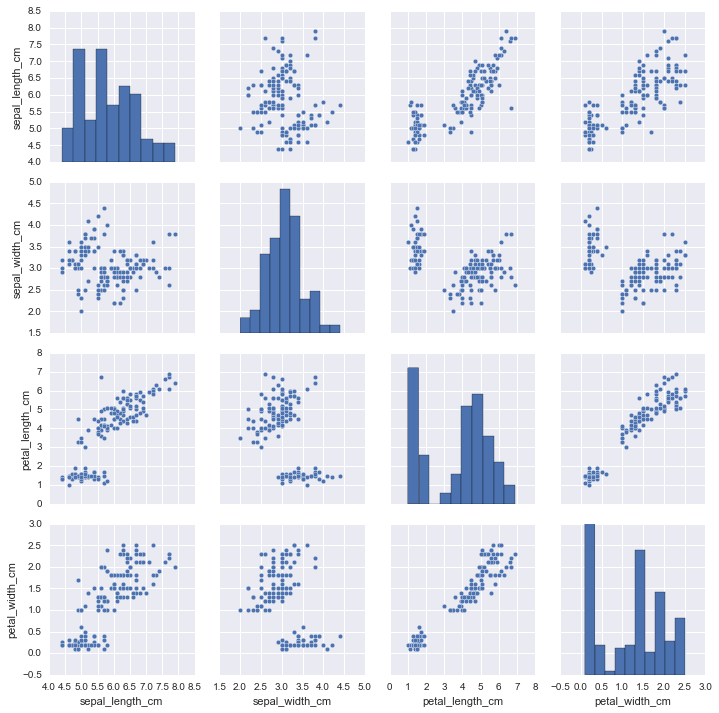

In [17]:
sns.pairplot(iris_data_clean)

Nuestra data se encuentra mayoritariamente distribuida en forma normal.

Hay algo extraño con las medidas de petal. Quizas es algo relacionado con los diferentes tipos de `Iris`. Apliquemos color según las clases para tener mayor detalle.

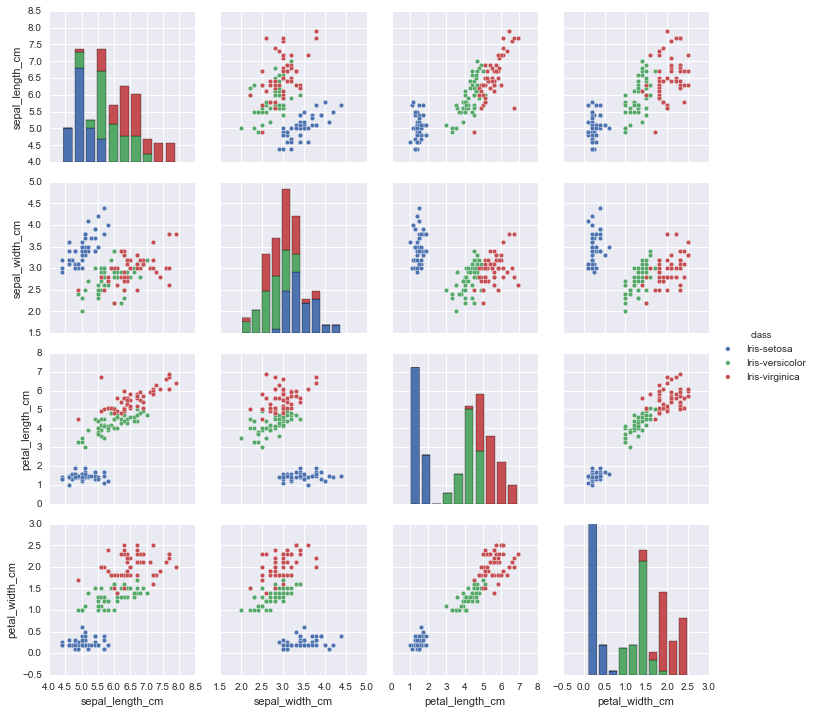

In [18]:
sns.pairplot(iris_data_clean, hue='class')

Efectivamente, la distribución extraña de las medidas del pétalo existe debido a las diferentes especies. Esto es en realidad una gran noticia para nuestra tarea de clasificación, ya que significa que las medidas de pétalos harán que sea fácil distinguir entre 'Iris-setosa' y los otros tipos de 'Iris'.

Distinguir entre `Iris-versicolor` y `Iris-virginica` será mas complicado dada la superposicion de datos.

Tambien hay correlacion entre petal length y petal width, como tambien entre sepal length y sepal width.
Los biólogos de campo nos aseguran que esto es lo que se espera: los pétalos de flores más largos también tienden a ser más anchos, y lo mismo se aplica a los sépalos.

Utilizaremos [**violin plots**](https://en.wikipedia.org/wiki/Violin_plot) para comparar las medidas de las 

Utilizaremos **violin plots** para graficar los datos y comparar las distribuciones de medidas de las clases. El grafico de violin contiene la misma informacion que los [box plots](https://en.wikipedia.org/wiki/Box_plot), pero tambien escala el box de acuerdo a la densidad de los datos.

/Users/hrivera/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/hrivera/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


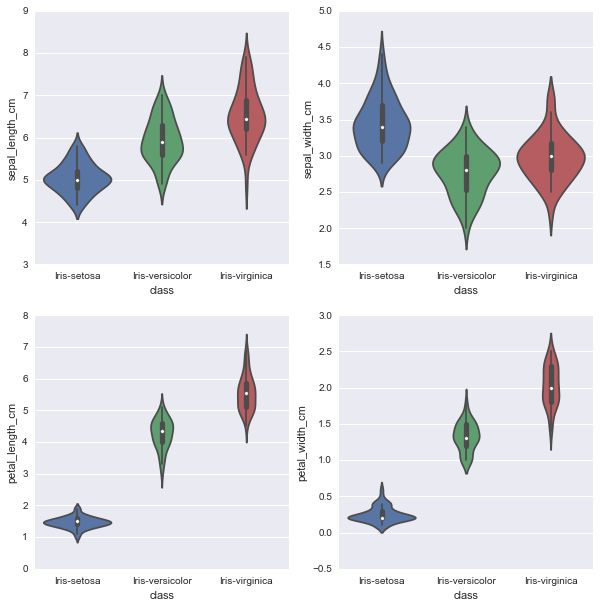

In [19]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='class', y=column, data=iris_data_clean)

Miramos los clusters que podrian existir en los datos. Para ello, eliminamos en forma temporal la etiqueta `class` del Dataset

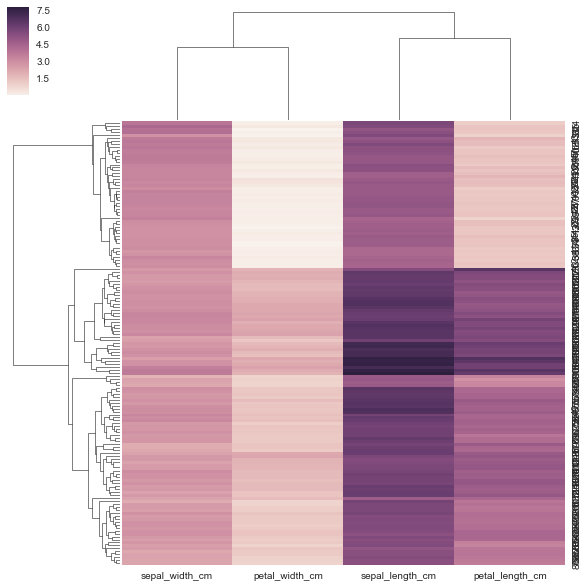

In [20]:
sns.clustermap(iris_data_clean.drop('class', axis=1))

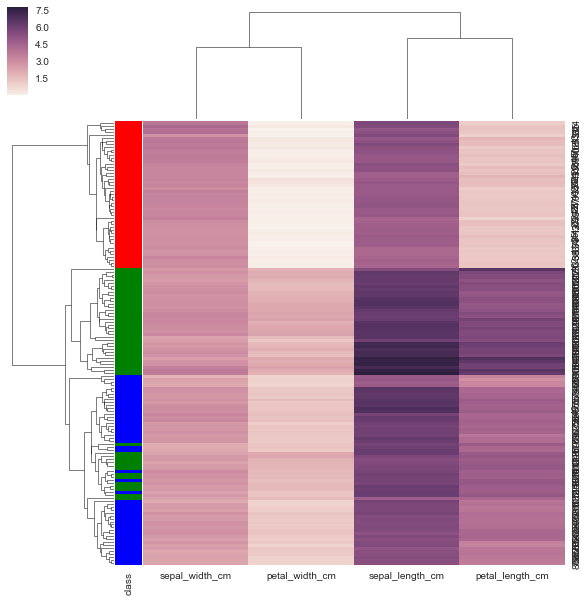

In [21]:
lut = dict(zip(iris_data_clean['class'].unique(), "rbg"))
row_colors = iris_data_clean['class'].map(lut)
sns.clustermap(iris_data_clean.drop('class', axis=1),  row_colors=row_colors)

Suficiente de coqueteo con los datos, vamos a modelar.

## Step 5: Clasificación

[[ Indice ]](#Indice)

A pesar de lo agotador que es ordenar y explorar nuestros datos es un componente vital para cualquier análisis de datos. Si hubiéramos saltado directamente al paso de modelado, habríamos creado un modelo de clasificación defectuoso.

Recuerda: **Bad data leads to bad models.** Siempre chequea los datos primero.

Asegurados de que nuestros datos están ahora tan limpios como podemos hacerlo, y armados con un conocimiento superficial de las distribuciones y relaciones en nuestro conjunto de datos, es hora de dar el siguiente gran paso en nuestro análisis: dividir los datos en conjuntos de entrenamiento y prueba.

**Training set** Es un subset aleatorio de datos que se utiliza para entrenar nuestro modelo con datos

**Testing set** Es un subset aleatorio de datos (Mutuamente excluyente) que se utiliza para validar nuestro modelo con información nueva o no vista.

Especialmente en conjuntos de datos dispersos como el nuestro, es fácil para los modelos ** sobreestimar ** los datos: el modelo aprenderá tan bien el conjunto de entrenamiento que no podrá manejar la mayoría de los casos que nunca antes se haya visto. Es por eso que es importante para nosotros construir el modelo con el conjunto de entrenamiento, pero puntuarlo con el conjunto de pruebas.

Tenga en cuenta que una vez que dividimos los datos en un conjunto de entrenamiento y prueba, debemos tratar el conjunto de pruebas como si ya no existiera: no podemos usar ninguna información del conjunto de pruebas para construir nuestro modelo o de lo contrario estamos haciendo trampa.

In [22]:
iris_data_clean = pd.read_csv('iris-data-clean.csv')

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [23]:
all_classes[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

Nuestra data esta lista para ser dividida.

In [24]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

Con nuestra división de datos, podemos comenzar a adaptar modelos a nuestros datos. El Jefe de datos de nuestra empresa trata de clasificadores de árboles de decisión, así que empecemos con uno de ellos.

Los clasificadores de árbol de decisión son increíblemente simples en teoría. En su forma más simple, los clasificadores de árbol de decisión hacen una serie de preguntas Sí / No sobre los datos, cada se acerca mas a descubrir la clase de cada entrada, hasta que clasifican perfectamente el conjunto de datos o simplemente no pueden diferenciar un conjunto de entradas. 

El siguiente es un ejemplo de un clasificador utilizando decision tree:

<img src="iris_dtc.png"/>

Observe cómo el clasificador hace preguntas Sí / No sobre los datos, si una característica determinada es <= 1.75, por ejemplo, por lo que puede diferenciar los registros. Esta es la esencia de cada árbol de decisión.

Lo bueno de los clasificadores de árboles de decisión es que son ** invariantes de escala **, es decir, la escala de las características no afecta su rendimiento, a diferencia de muchos modelos de Machine Learning. En otras palabras, no importa si nuestras características van desde 0 a 1 o de 0 a 1,000; los clasificadores del árbol de decisión trabajarán con ellos de la misma manera.

Hay varios parametros [parameters](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) que pueden ser ajustados para el arbol de decision, pero por ahora utilizaremos un clasificador simple.

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el clasificador
decision_tree_classifier = DecisionTreeClassifier()

# Entrenamos el clasificador con el subset de entrenamiento
decision_tree_classifier.fit(training_inputs, training_classes)

# Validamos el clasificador sobre el subset de test utilizando `accuracy`
decision_tree_classifier.score(testing_inputs, testing_classes)

0.97368421052631582

Nuestro modelo alcanza un 97% sin mucho esfuerzo.

Sin embargo, hay una trampa: Dependiendo de cómo se muestreó nuestro conjunto de entrenamiento y prueba, nuestro modelo puede lograr entre 80% y 100% de precisión:

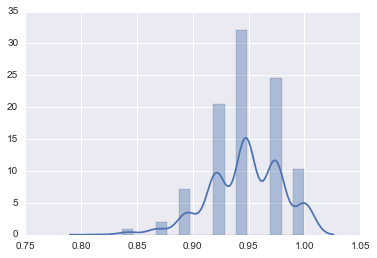

In [26]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sns.distplot(model_accuracies)

Obviamente existe un problema con nuestro modelo al desempeñar bastante diferente dependiendo del subset de datos de entrenamiento. Este fenomeno se conoce como **overfitting**: El modelo aprendio a clasificar tan bien con el subset de entrenamiento que no generaliza lo suficientemente bien con nueva información.

### Cross-validation

[[ Indice ]](#Indice)

Este problema es la principal razon que la mayoria de los Datascientists utilizan ***k*-fold cross-validation** en sus modelos: Dividor el dataset original en *k* subset, usar uno de los subset para testing, y el resto de los subset son utilizados para entrenamiento. Este proceso es entonces repetido *k* veces hasta que todos los subset son ocupados.

10-fold cross-validation es el mas utilizado, por lo tanto es lo que ocuparemos. Ejecutar 10-fold cross-validtion sobre nuestra data luce algo parecido a lo siguiente:

(Cada cuadrado es un entrada en nuestro Dataset)

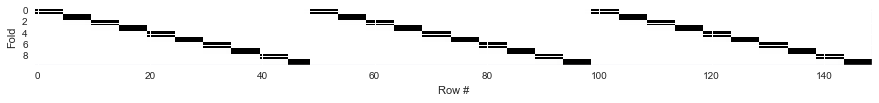

In [38]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
        
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

    
plot_cv(StratifiedKFold(all_classes, n_folds=10), len(all_classes))

Notaras que usamos **Stratified *k*-fold cross-validation** en el código anterior. Estratificado *k*-fold mantiene las proporciones de clase iguales en todos los pliegues, lo cual es vital para mantener un subconjunto representativo de nuestro conjunto de datos. (Por ejemplo, por lo que no tenemos entradas 100% `Iris setosa` en uno de los pliegues).

Utilizaremos un 10-fold cross-validation en nuestro modelo con el siguiente codigo.

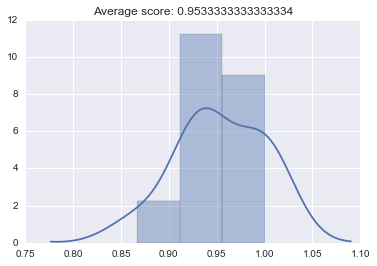

In [39]:
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()


# cross_val_score retorna una lista de scores, los cuales se pueden visualizar
# obteniendo un rasonable estimador del desempeño de nuestro clasificador
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Ahora tenemos una calificación mucho más consistente de la precisión de clasificación general de nuestro clasificador.

### Ajuste de parametros

[[ Indice ]](#Indice)

Cada modelo de ML viene con una variedad de parametros que se pueden ajustar, los cuales, puede ser de vital importacia para el desempeño de nuestro clasificador. En nuestro caso, podriamos limitar la profundidad de nuestro decision tree:

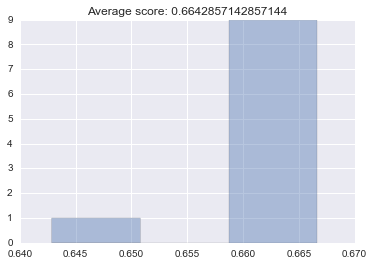

In [40]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sns.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

El accuracy cae fuertemente.

Por lo tanto, necesitamos encontrar un método sistemático para descubrir los mejores parámetros para nuestro modelo y conjunto de datos.

El método más común para el ajuste de parámetros del modelo es ** Grid Search **. La idea detrás de Grid Search es simple: explore un rango de parámetros y encuentre la combinación de parámetros de mejor rendimiento. Enfoque su búsqueda en el mejor rango de parámetros, luego repita este proceso varias veces hasta que se descubran los mejores parámetros.

Afinaremos nuestro clasificador. Seguiremos solo con dos parámetros por ahora, pero es posible explorar simultáneamente docenas de parámetros si lo deseas.

In [41]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9664429530201343
Best parameters: {'max_features': 1, 'max_depth': 5}


Visualizaremos la funcion de busqueda para ver como interactuan los parametros.

/Users/hrivera/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


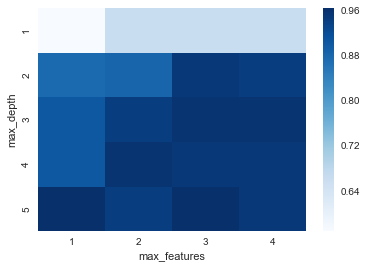

In [42]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sns.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Ahora tenemos una mejor idea del espacio de parámetros: sabemos que necesitamos una `max_depth` de al menos 2 para permitir que el árbol de decisiones tome más de una decisión única.
 
`max_features` realmente no parece hacer una gran diferencia, siempre y cuando tengamo 2 de ellos, lo cual tiene sentido ya que nuestro conjunto de datos tiene solo 4 características y es relativamente fácil de clasificar. (Recuerde, una de las clases de nuestro conjunto de datos se puede separar fácilmente del resto en función de una única característica).

Avancemos y utilicemos una búsqueda para encontrar la mejor configuración para un conjunto de parámetros.

In [43]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9731543624161074
Best parameters: {'criterion': 'entropy', 'max_features': 2, 'splitter': 'best', 'max_depth': 5}


Ahora podemos tomar el mejor clasificador de la Grid Search y usar eso:

In [44]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Incluso podemos visualizar el árbol de decisión con [GraphViz](http://www.graphviz.org/) para ver cómo está haciendo las clasificaciones:

In [53]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(decision_tree_classifier,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa','Versicolor','Virginica'],
                           feature_names=['petal length','petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

IndexError: list index out of range

<img src="iris_dtc.png" />

¡Bien! Finalmente tenemos nuestro clasificador de demostración. Vamos a crear algunos gráficos de su rendimiento para que tengamos algo que mostrar el Jefe de datos de nuestra empresa.

/Users/hrivera/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


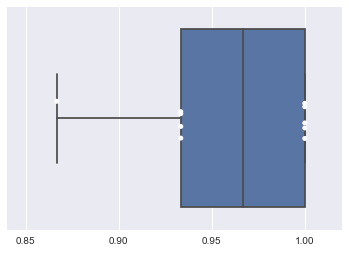

In [34]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='white')

In [43]:
list(dt_scores)

[1.0,
 0.93333333333333335,
 1.0,
 0.93333333333333335,
 0.93333333333333335,
 0.93333333333333335,
 0.8666666666666667,
 1.0,
 1.0,
 1.0]

Hmmm ... esto es un poco aburrido. ¿Qué tal si comparamos otro clasificador para ver cómo funcionan?

Ya sabemos por proyectos anteriores que los clasificadores de Random Forest generalmente funcionan mejor que los árboles de decisión individuales. Un problema común que enfrentan los árboles de decisión es que son propensos a sobreajustar: se complejizan hasta el punto de que clasifican el conjunto de entrenamiento casi a la perfección, pero no logran generalizar a datos que no habían visto antes.

**Random Forest classifiers** trabajar alrededor de esa limitación creando un conjunto completo de árboles de decisión (de ahí "bosque")

Gran parte de scikit-learn es que el proceso de entrenamiento, prueba, ajuste de parámetros, etc. es el mismo para todos los modelos, por lo que solo debemos conectar el nuevo clasificador.

In [35]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9664429530201343
Best parameters: {'n_estimators': 5, 'criterion': 'gini', 'max_features': 2, 'warm_start': False}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Ahora podemos comparar el desempeño de ambos clasificadores:

/Users/hrivera/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


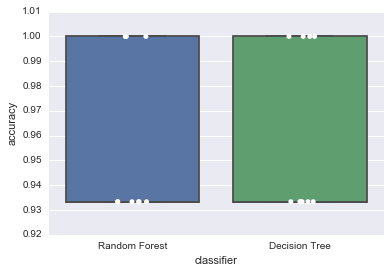

In [36]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sns.boxplot(x='classifier', y='accuracy', data=both_df)
sns.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='white')

Ambos parecen tener el mismo rendimiento en este conjunto de datos. Probablemente esto se deba a las limitaciones de nuestro conjunto de datos: solo tenemos 4 funciones para hacer la clasificación, y los clasificadores de Random Forest se destacan cuando hay cientos de características posibles para observar. En otras palabras, no había mucho margen de mejora con este conjunto de datos.

## Step 6: Conclusiones

[[ Indice ]](#Indice)

En este notebook hemos barrido con un ejemplo simple las caracteristicas de python para las siguientes tareas:
* Data mining
* Exploracion de datos
* Machine learning
* Hyperparametros